# AE4465 (MM&A) - Lecture4 (Moving Average for forecasting)

In statistics, a Moving Average (MA) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set.

The moving average is a technique that is an average of any subset of numbers.

$$f_{t+1} =\frac{1}{m} \sum_{k=0}^{m-1} y_{t-k}$$

where
$f_{t+1}$ is the forecast of the next value
$m$ is the window size
$y$ is the signal value at some moment in time

In this tutorial you will learn how to use moving average to forecast a future trend of spare part demand.


In [2]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Import the data in csv file
sparepartdemand_dt = pd.read_csv('data/les04_MAdataforecast.csv')
# Read the columns
print('The columns of the csv file are: ')
# Iterate over two arrays (column names and index) and print accordingly
for colname, i in zip(sparepartdemand_dt.columns, range(len(sparepartdemand_dt.columns))):
    print(i, '- Column: ', colname)
sparepartdemand_dt['Month'] = pd.to_datetime(sparepartdemand_dt['Month'], format='%Y-%m')
sparepartdemand_dt = sparepartdemand_dt.set_index('Month')
sparepartdemand_dt.head()


The columns of the csv file are: 
0 - Column:  Month
1 - Column:  Demand


,Demand
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Split the data into training and testing sets

In [8]:
train_len = 120
train = sparepartdemand_dt[0:train_len] # first 120 months as training set
test = sparepartdemand_dt[train_len:] # last 24 months as out-of-time test set

C:\Users\Owner\AppData\Local\Temp\ipykernel_46296\2828286814.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]


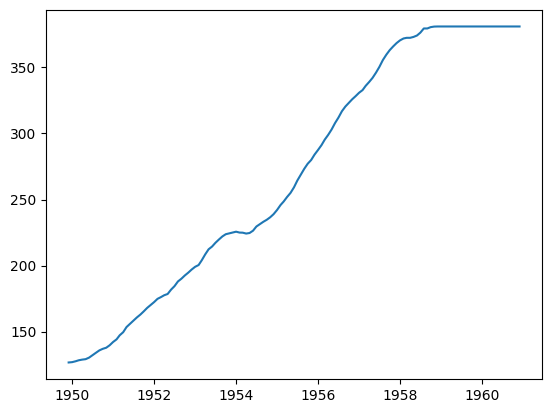

In [10]:
y_hat_sma = sparepartdemand_dt.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = sparepartdemand_dt['Demand'].rolling(ma_window).mean()

y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

plt.plot(y_hat_sma['sma_forecast'])
plt.show()

### Forecast
We are predicting the test set to be equal to the last value of the moving average

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Demand'], label='Train')
plt.plot(test['Demand'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Conclusion
Moving averages are calculated based on historical data and it is not so much a predictive exercise. Therefore, results using moving averages can be random.

Moving averages work quite well in strong trending conditions but poorly in varying conditions. Adjusting the time frame can address this problem temporarily, though in some case studies, these issues are likely to occur regardless of the time frame chosen for the moving average(s).